In [10]:
# SIRS Model, with custom radius r, a Moore neighbourhood, starting with a single infectious seed.
# and added a lockdown mechanism to reduce the radius of spread from r to 1. Since setting it to 0
# generates overly idealistic situations, I set the lockdown radius to 1 with a "lockdown factor"
# which can be varied between 0 and 1 (which is multiplied to prob of infection spread).
# 0=>strict lockdown, no contacts, hence it dies out quickly. 1=> radius=1 and infection spreads accordingly.

#put p_quar=0 to remove quarantine feature.

In [11]:
import numpy as np
from timeit import default_timer as timer
from colour import Color
from matplotlib import colors
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import gif

#CUSTOM CMAP
def customcmap(t_i, t_r):
    q = Color("#091221")
    s = Color("#f5ebeb")
    i1 = Color("#5e0202")
    i2 = Color("#e81717")
    r1 = Color("#e8c917")
    r2 = Color("#e8db90")
    clist =[q] + [s] + list(i1.range_to(i2, t_i)) + list(r1.range_to(r2, t_r))
    clist = [c.hex for c in clist]
    
    return colors.ListedColormap(clist)




#PROPOGATOR FUNCTION
def propogator(tau_t,x_dim,y_dim,t_i,t_r,det_prob,r,w_sum,bc_r,lf,days, p_quar): # lf is lockdown factor, bc_r is boundary condition radius
    #looping through all the blocks (except the boundaries)              # days are the number of days after which an infectious
                                                                         # person is transferred to quarantine centre
                                                                         # p_quar is prob of sending to quarantine!
    
    t=tau_t.copy()  #use .copy() to prevent simaltaneous changes in both t and tau_t
    count=0
    
    for i in np.arange(r,x_dim+bc_r):
        for j in np.arange(r,y_dim+bc_r):
        
            #for susceptible individuals (Using MOORE Neighbourhood)
            if(tau_t[i][j]==0):    
                count=0
                probability=0   
                
                for k in np.arange(-r,r+1):
                    for l in np.arange(-r,r+1):
                        if(1<=tau_t[i+k][j+l]<=t_i and (k,l)!=(0,0)):
                            w=max(abs(k),abs(l)) #weight of each cell
                            count=count+(r-(w-1))
                
                probability=(count/w_sum)*lf
                x=np.random.random()
                if(x<=probability*det_prob): #if det_prob=8, even a single infected neighbour can infect, for det_prob=1, we get the standard probabilistic model.
                    t[i][j]=1
                
            #for sending to quarantine with probabilty p_quar
            elif(tau_t[i][j]==days+1):
                ran=np.random.random()
                if(ran<=p_quar):
                    t[i][j]= -1
                else:
                    t[i][j]=t[i][j]+1
                
            #for infected and refractory
            elif(1<=tau_t[i][j]<t_i+t_r):
                t[i][j]=t[i][j]+1
                
            #last stage (tau_0----->0)
            elif(tau_t[i][j]==t_i+t_r):
                t[i][j]=0
    #BOUNDARY CONDITIONS (just recovered after getting infected)
    i=0
    for i in range(bc_r):                 #All borders of width = (radius) are fixed boundaries.
        t[:,i]=t_i+1
        t[i,:]=t_i+1
        t[:,y_dim+(2*bc_r-(i+1))]=t_i+1
        t[x_dim+(2*bc_r-(i+1)),:]=t_i+1
    
    return t


#for counting number of infected, refractory and susceptible individuals 
def datastats(state,x_dim, y_dim, t_i,t_r,r):
    qua=0
    inf=0
    ref=0
    sus=0
    for i in np.arange(r,x_dim+r):
        for j in np.arange(r,y_dim+r):
            if (state[i][j]== -1):
                qua=qua+1                
            if (state[i][j]==0):
                sus=sus+1
            if (1<=state[i][j]<=t_i):
                inf=inf+1
            if ((t_i+1)<=state[i][j]<=(t_i+t_r)):
                ref=ref+1
    
    return sus,inf,ref,qua

In [12]:
# (FOR A MIXED INITIAL POPULATION OF SUSCEPTIBLE AND INFECTED PEOPLE)

#INITIAL CONDITIONS


#Distribution of Initial Population

#p=0.00      # INITIAL FRACTION OF INFECTION

#tau_list=np.zeros(((x_dim + 2)*(y_dim + 2)), dtype=int)  

#for k in range ((x_dim + 2)*(y_dim + 2)):
#    rand=np.random.random()
#    if(0<=rand<p):
#        tau_list[k]=tau_list[k]+1
#    elif(p<=rand<=1):
#        tau_list[k]=tau_list[k]+0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


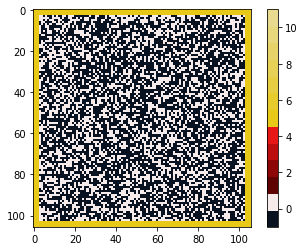

Runtime   69.53604109999998
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


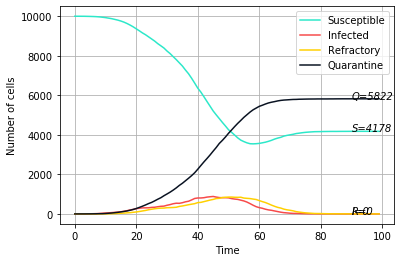

Susceptible = 4178
Infected = 0
Refractory = 0
Quarantined = 5822


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


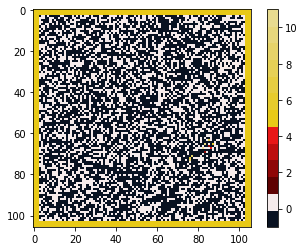

Runtime   53.6273415
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


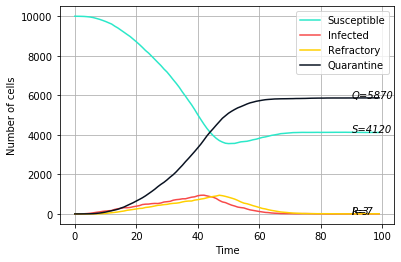

Susceptible = 4120
Infected = 3
Refractory = 7
Quarantined = 5870


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


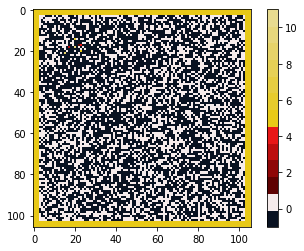

Runtime   60.02973399999996
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


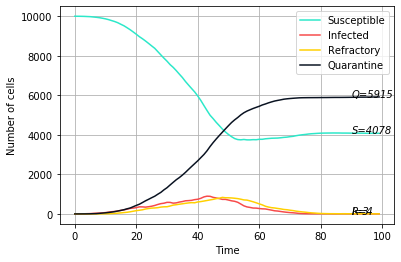

Susceptible = 4078
Infected = 3
Refractory = 4
Quarantined = 5915


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


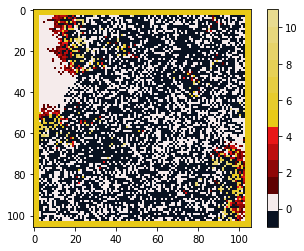

Runtime   55.19568899999996
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


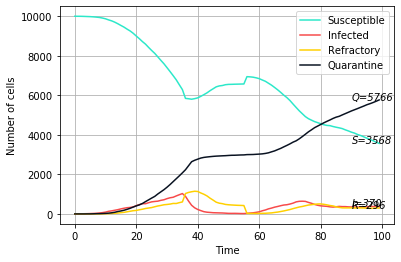

Susceptible = 3568
Infected = 370
Refractory = 296
Quarantined = 5766


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


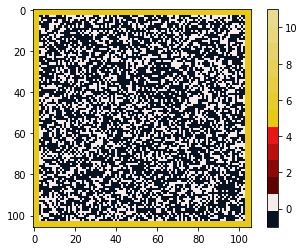

Runtime   54.568997199999956
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


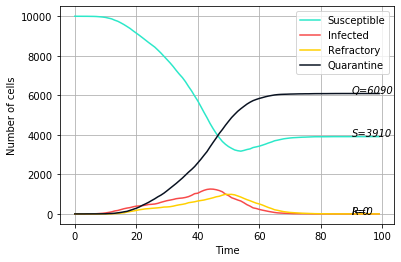

Susceptible = 3910
Infected = 0
Refractory = 0
Quarantined = 6090


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


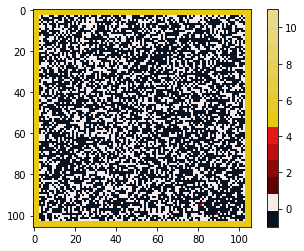

Runtime   51.37300420000008
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


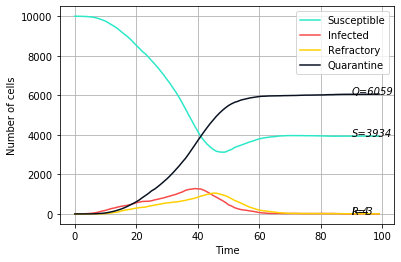

Susceptible = 3934
Infected = 4
Refractory = 3
Quarantined = 6059


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


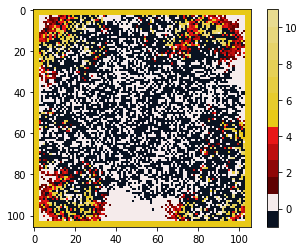

Runtime   50.8234020000001
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


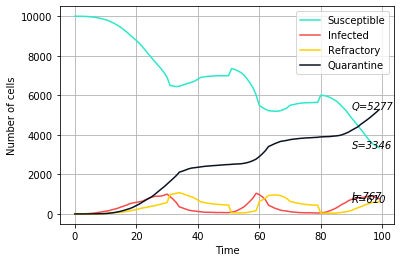

Susceptible = 3346
Infected = 767
Refractory = 610
Quarantined = 5277


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


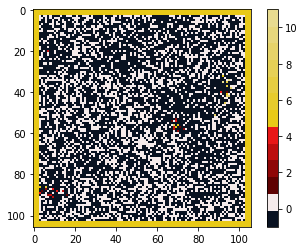

Runtime   50.70302389999995
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


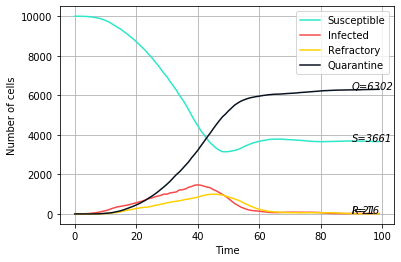

Susceptible = 3661
Infected = 21
Refractory = 16
Quarantined = 6302


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


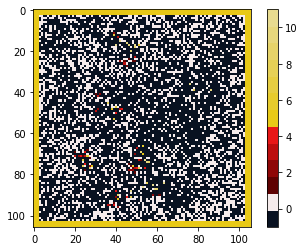

Runtime   51.75010889999999
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


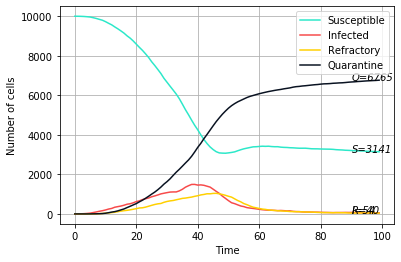

Susceptible = 3141
Infected = 54
Refractory = 40
Quarantined = 6765


In [13]:
#Randomly distributed initial population with only susceptible and refractory at different stages. Only one infected in the middle.
#leads to persisting infection waves.


#MAIN PROGRAM

#parameters

for day in [1,3]
    for p_quarantine in [0.25,0.5,0.75]:
        for lockdown_factor in [0.25,0.5,0.75]:
            for lock_bound in [1500, 2000]:
                
                radius=3
                det_prob=1   #Deterministic((2*radius+1)**2 -1) or Probablistic(1) Automata
                t_i=4                           # 1<=t<=t_i is the infected range
                t_r=7                           # t_i+1<=t<=t_i+t_r is the refractory range
                x_dim=100
                y_dim=100
                time=100
                cmap = customcmap(t_i, t_r)


                #total weight due to r!=1
                weight_sum=0
                for a in np.arange(1,radius+1):
                    weight_sum = weight_sum + ((radius-(a-1))*(8*a))
                
                #INITIAL CONDITIONS
                
                
                #Distribution of Initial Population
                
                tau_list=np.zeros(((x_dim + 2*radius)*(y_dim + 2*radius)), dtype=int)  
                #p_ref=0.3  #initial percentage of refractory population
                
                #for k in range ((x_dim + 2*radius)*(y_dim + 2*radius)):
                #    rand=(np.random.random())
                #    if(0<=rand<=p_ref):
                #        rand2=int(np.random.randint(low=1,high=7))
                #        tau_list[k]=tau_list[k]+rand2+t_i
                    
                tau=np.reshape(tau_list,(x_dim+2*radius,y_dim+2*radius))
                
                
                #BOUNDARY CONDITIONS 
                i=0
                for i in range(radius):                 #All borders of width = (radius) are fixed boundaries.
                    tau[:,i]=t_i+1
                    tau[i,:]=t_i+1
                    tau[:,y_dim+(2*radius-(i+1))]=t_i+1
                    tau[x_dim+(2*radius-(i+1)),:]=t_i+1
                
                tau[(x_dim+2*radius)//2,(y_dim+2*radius)//2]=1  #single infection in the middle




                suslist=[]
                inflist=[]
                reflist=[]
                qualist=[]
                tarray=np.arange(time)
                
                start = timer()
                fig=plt.figure()
                state=tau.copy()
                sus,inf,ref,qua =datastats(state, x_dim, y_dim, t_i, t_r, radius)
                suslist.append(sus)
                inflist.append(inf)
                reflist.append(ref)
                qualist.append(qua)
                plt.colorbar(plt.imshow(state, cmap=cmap, interpolation = 'nearest', vmin = -1, vmax = t_i+t_r))
                ims=[]                 
                im=plt.imshow(state, animated=True, cmap = cmap, vmin = -1, vmax = t_i+t_r)
                ims.append([im])
                t=1
                while(t<time):
                    x=0  
                    
                    if(inf+qua>=lock_bound):
                        while(x<20 and t<time):
                            state_new=propogator(state,x_dim,y_dim,t_i,t_r,det_prob,1,8,radius,lockdown_factor,day,p_quarantine)
                            state=state_new.copy()
                            sus,inf,ref,qua=datastats(state, x_dim, y_dim, t_i, t_r, 1)
                            suslist.append(sus)
                            inflist.append(inf)
                            reflist.append(ref)
                            qualist.append(qua)
                            im=plt.imshow(state, animated=True, cmap = cmap, vmin = -1, vmax = t_i+t_r)
                            ims.append([im])      
                            x=x+1
                            t=t+1
                    else:
                        state_new=propogator(state,x_dim,y_dim,t_i,t_r,det_prob,radius,weight_sum,radius,1,day,p_quarantine)
                        state=state_new.copy()
                        sus,inf,ref,qua=datastats(state, x_dim, y_dim, t_i, t_r, radius)
                        suslist.append(sus)
                        inflist.append(inf)
                        reflist.append(ref)
                        qualist.append(qua)
                        im=plt.imshow(state, animated=True, cmap = cmap, vmin = -1, vmax = t_i+t_r)
                        ims.append([im])      
                        t=t+1
        
                ani=animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
                ani.save('GIF  '+ 'lf= '+ str(lockdown_factor)+ ', p_quar= '+ str(p_quarantine)+ ', day= '+ str(day) + ', lockdown_bound= '+ str(lock_bound)+'.gif', writer='imagemagick', fps=10)
                #check for changes on github
                end = timer()
                plt.show()

                print("Runtime  ",end-start)
                print(len(inflist),len(suslist),len(reflist),len(qualist))
                y=[suslist[time-1], inflist[time-1], reflist[time-1], qualist[time-1]]
                fig = plt.figure()
                plt.plot(tarray, suslist,'#2ce8c9', label="Susceptible")
                plt.plot(tarray, inflist,'#f74a4a', label="Infected")
                plt.plot(tarray, reflist,'#ffd000', label="Refractory")
                plt.plot(tarray, qualist,'#091221', label="Quarantine")
                plt.legend(loc="upper right")
                plt.grid(True)
                plt.xlabel('Time')
                plt.ylabel('Number of cells')
                ax = fig.add_subplot(111)
                ax.text(time-10, suslist[time-1], 'S='+str(suslist[time-1]), style='italic')
                ax.text(time-10, inflist[time-1], 'I='+str(inflist[time-1]), style='italic')
                ax.text(time-10, reflist[time-1], 'R='+str(reflist[time-1]), style='italic')
                ax.text(time-10, qualist[time-1], 'Q='+str(qualist[time-1]), style='italic')
    
                plt.savefig('PLOT  ' + 'lf= '+ str(lockdown_factor)+ ', p_quar= '+ str(p_quarantine)+ ', day= '+ str(day) + ', lockdown_bound= '+ str(lock_bound)+ '.png', dpi=(250))
                plt.show()
                print("Susceptible =", suslist[time-1])
                print("Infected =", inflist[time-1])
                print("Refractory =", reflist[time-1])
                print("Quarantined =", qualist[time-1])


In [17]:
for x in np.arange(1,4,2):
    print (x)

1
3


In [27]:
f=np.reshape(np.zeros(9, dtype=int),(3,3))
i=0
for i in range(3):
    for j in range(3):
        p=np.random.random()
        f[i][j]=np.array([p,1+p])
print(f)

ValueError: setting an array element with a sequence.